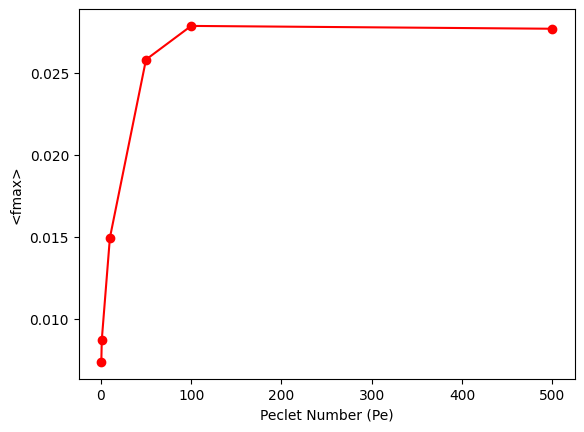

In [1]:
import clustered_abp_sim as abp_sim
import numpy as np
import matplotlib.pyplot as plt

#simulation parameters
N = 1000
radius = 1.0
phi = 0.5
dt = 0.01
steps = 20000
transient_steps = 5000

Pe_list = [0.5,1,10, 50, 100, 500]

L = np.sqrt(N * np.pi * radius**2 / phi)  # box length

positions = np.random.rand(N, 2) * L
thetas = 2 * np.pi * np.random.rand(N)
fmax_avgs = []

for Pe in Pe_list:
    system = abp_sim.System(N, L, Pe)
    system.initialize_particles(
    positions.tolist(),
    thetas.tolist())


    particles = system.get_particles()
    evolver = abp_sim.Evolver(system)
    fmax_vals = []

    for _ in range(transient_steps):
        evolver.step()

    for _ in range(steps- transient_steps):
        evolver.step()
        system.find_clusters()
        sizes = system.cluster_sizes
        f_max = max(sizes) / N
        fmax_vals.append(f_max)

    fmax_avg = np.mean(fmax_vals)
    fmax_avgs.append(fmax_avg)


plt.figure()
plt.plot(Pe_list, fmax_avgs, marker='o', color = 'r')
plt.xlabel("Peclet Number (Pe)")
plt.ylabel("<fmax>")
plt.show()


